## Isha Rathi 111903037
## Mihir Malani 111903046
## Nikita Tipule 111903051

## Stock Price Prediction

In [18]:
import quandl
import pandas as pd
import os
import pickle
import bs4 as bs
import requests
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 

In [2]:
#To get API key, create an account on Quandl website.
#Obtaining API Key lets you make more than 50 API calls in a day.
quandl.ApiConfig.api_key='9UQueqK3TqQpjo4XNexF'

In [3]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    print(f"soup:{soup}")

In [4]:
nifty_50_list()

soup:<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>NIFTY 50 - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"245dd573-b6f6-4557-b7ad-41ef80a647f5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"NIFTY_50","wgTitle":"NIFTY 50","wgCurRevisionId":1083387864,"wgRevisionId":1083387864,"wgArticleId":1328813,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from March 2022","Articles with short description","Short description is different from W

In [5]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    #Goto wiki page and do inspect element
    # Find all the table tags whose class is wikitable sortable, insie that there is 'tbody' tag
    # and extract all the data from there 
    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')
    print(table)
nifty_50_list()

<table class="wikitable sortable" id="constituents" style="font-size:85%">
<tbody><tr>
<th>Company Name</th>
<th>Symbol</th>
<th>Sector
</th></tr>
<tr>
<td><a href="/wiki/Adani_Ports_%26_SEZ" title="Adani Ports &amp; SEZ">Adani Ports</a></td>
<td>ADANIPORTS</td>
<td>Infrastructure
</td></tr>
<tr>
<td><a href="/wiki/Apollo_Hospitals" title="Apollo Hospitals">Apollo Hospitals</a></td>
<td>APOLLOHOSP</td>
<td>Healthcare
</td></tr>
<tr>
<td><a href="/wiki/Asian_Paints" title="Asian Paints">Asian Paints</a></td>
<td>ASIANPAINT</td>
<td>Consumer Goods
</td></tr>
<tr>
<td><a href="/wiki/Axis_Bank" title="Axis Bank">Axis Bank</a></td>
<td>AXISBANK</td>
<td>Banking
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Auto" title="Bajaj Auto">Bajaj Auto</a></td>
<td>BAJAJ-AUTO</td>
<td>Automobile
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finance" title="Bajaj Finance">Bajaj Finance</a></td>
<td>BAJFINANCE</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finserv" title="Bajaj Finserv">Baja

In [6]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    #Goto wiki page and do inspect element
    # Find all the table tags whose class is wikitable sortable, insie that there is 'tbody' tag
    # and extract all the data from there 
    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')

    tickers = []
    for row in table.findAll('tr')[1:]: # 0th <tr> tag contains Company,Sysmbol,Sector.. Not needed
        ticker = row.findAll('td')[1].text  #First <td> tag data
        print(ticker.split('.')[0])
nifty_50_list() 

ADANIPORTS
APOLLOHOSP
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BHARTIARTL
BPCL
BRITANNIA
CIPLA
COALINDIA
DIVISLAB
DRREDDY
EICHERMOT
GRASIM
HCLTECH
HDFC
HDFCBANK
HDFCLIFE
HEROMOTOCO
HINDALCO
HINDUNILVR
ICICIBANK
INDUSINDBK
INFY
ITC
JSWSTEEL
KOTAKBANK
LT
M&M
MARUTI
NESTLEIND
NTPC
ONGC
POWERGRID
RELIANCE
SBIN
SBILIFE
SHREECEM
SUNPHARMA
TATAMOTORS
TATASTEEL
TCS
TATACONSUM
TECHM
TITAN
ULTRACEMCO
UPL
WIPRO


In [7]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')

    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')

    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        tickers.append(ticker.split('.')[0])

    with open("nifty50_list.pickle","wb") as f:
        pickle.dump(tickers,f)
    
    #Adding it manually since ticker name obtained from Wikipedia contains a hypen whereas quandl code expects an underscore
    tickers = list(map(lambda x: x.replace("BAJAJ-AUTO","BAJAJ_AUTO"), tickers))
    #Adding it manually since quandl code is different than the ticker symbol obtained from Wiki which is M&M
    tickers = list(map(lambda x: x.replace("M&M","MM"), tickers))
    #Fetching data for NIFTY50 index whose price we want to PREDICT
    tickers.append('NIFTY_50')
    # We will remove below ones since data ins't available
    tickers.remove('TATACONSUM')
    return tickers

In [8]:
#function to scrap NIFTY50 list from WIKI only if not already obtained
def get_nifty50_list(scrap=False):
    if scrap:
        tickers=nifty_50_list()
    else:
        with open("nifty50_list.pickle","rb") as f:
            tickers=pickle.load(f)
    return tickers

In [9]:
startdate="2000-01-01"
enddate="2021-12-31"

In [10]:
os.chdir('/home/isha/SixthSem/DS/Project/')

In [11]:
#function to fetch stock prices from Quandl and then storing them to avoid making duplicate calls to Quandl API

def getStockdataFromQuandl(ticker):
    quandl_code="NSE/"+ticker
    try:
        if not os.path.exists(f'stock_data/{ticker}.csv'):
            data=quandl.get(quandl_code,start_date=startdate,end_date=enddate)
            data.to_csv(f'stock_data/{ticker}.csv')
        else:
            print(f"stock data for {ticker} already exists")
    except quandl.errors.quandl_error.NotFoundError as e:
        print(ticker)
        print(str(e))

In [12]:
getStockdataFromQuandl('AXISBANK')

stock data for AXISBANK already exists


In [13]:
training_data = pd.read_csv('stock_data/AXISBANK.csv', na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

training_data.shape
training_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2007-08-16,588.00,594.9,551.00,558.0,557.85,860905.0,4860.75
2007-08-17,546.05,581.0,534.00,577.0,575.15,1338154.0,7494.97
2007-08-20,585.00,609.0,577.00,603.5,604.65,878025.0,5210.58
2007-08-21,613.90,613.9,587.00,587.0,590.90,441898.0,2647.03
2007-08-22,592.00,599.7,561.15,584.0,582.55,551499.0,3189.04


In [14]:
training_data = training_data.drop(['Last', 'Total Trade Quantity', 'Turnover (Lacs)'], axis=1)
training_data.head()

,Open,High,Low,Close
Date,,,,
2007-08-16,588.00,594.9,551.00,557.85
2007-08-17,546.05,581.0,534.00,575.15
2007-08-20,585.00,609.0,577.00,604.65
2007-08-21,613.90,613.9,587.00,590.90
2007-08-22,592.00,599.7,561.15,582.55


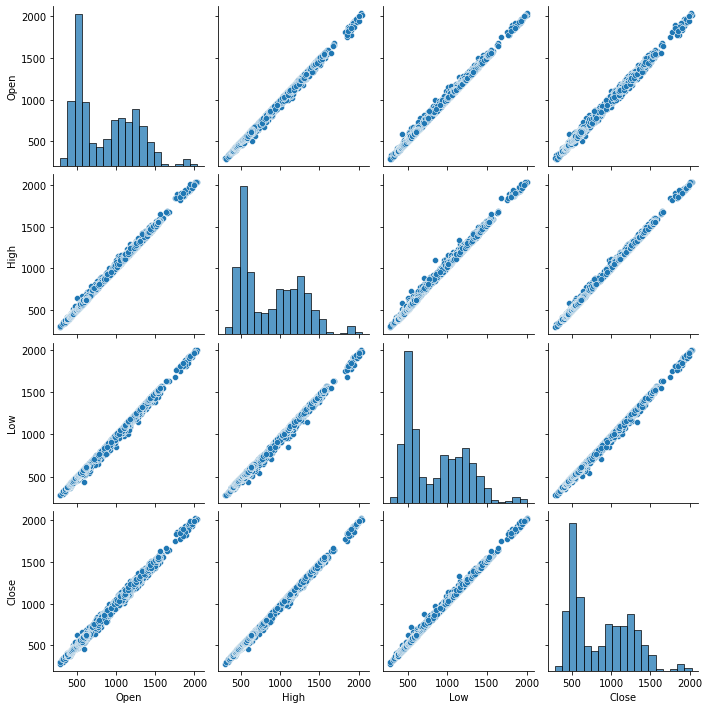

In [15]:
sns.pairplot(data=training_data)

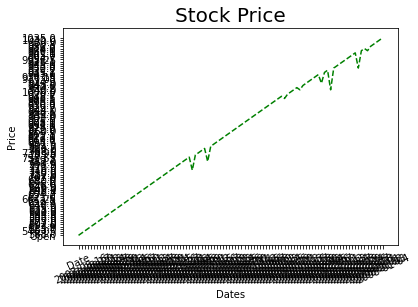

In [28]:
x = []
y = []
  
with open('./stock_data/AXISBANK.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(row[1])
x = x[:100]
y = y[:100]
plt.plot(x, y, color = 'g', linestyle = 'dashed',
         marker = '',label = "Stock Market")
  
plt.xticks(rotation = 25)
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Stock Price', fontsize = 20)
plt.show()

In [29]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,High
Date,
2007-08-16,594.9
2007-08-17,581.0
2007-08-20,609.0
2007-08-21,613.9
2007-08-22,599.7


In [30]:
# checking null values
print("Null Value Present: ", training_data.isnull().values.any())

Null Value Present:  False


In [31]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [32]:
# Getting the inputs and outputs

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)


(1257, 1)
(1257, 1)


In [33]:
# reshaping

x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [34]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


2022-05-03 18:00:58.355946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 18:00:58.355987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 1000)


2022-05-03 18:01:05.318398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-03 18:01:05.318462: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-03 18:01:05.318507: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (isha-Inspiron-14-5408): /proc/driver/nvidia/version does not exist
2022-05-03 18:01:05.319381: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
40/40 [==============================] - 1s 2ms/step - loss: 0.1578
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 3/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0594
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 7/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 8/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 9/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 10/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 11/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 12/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 13/1000
40/40 [====

40/40 [==============================] - 0s 2ms/step - loss: 2.0597e-04
Epoch 100/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0576e-04
Epoch 101/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0599e-04
Epoch 102/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0447e-04
Epoch 103/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0388e-04
Epoch 104/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0439e-04
Epoch 105/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0295e-04
Epoch 106/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0649e-04
Epoch 107/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0368e-04
Epoch 108/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0493e-04
Epoch 109/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0422e-04
Epoch 110/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 3ms/step - loss: 2.0114e-04
Epoch 194/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0222e-04
Epoch 195/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0280e-04
Epoch 196/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0206e-04
Epoch 197/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0130e-04
Epoch 198/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0097e-04
Epoch 199/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0245e-04
Epoch 200/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0161e-04
Epoch 201/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0174e-04
Epoch 202/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0111e-04
Epoch 203/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0345e-04
Epoch 204/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 2.0280e-04
Epoch 288/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0030e-04
Epoch 289/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0239e-04
Epoch 290/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9991e-04
Epoch 291/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0174e-04
Epoch 292/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0077e-04
Epoch 293/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0017e-04
Epoch 294/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0587e-04
Epoch 295/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0152e-04
Epoch 296/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9963e-04
Epoch 297/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0052e-04
Epoch 298/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 1.9969e-04
Epoch 382/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0023e-04
Epoch 383/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9935e-04
Epoch 384/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0031e-04
Epoch 385/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9892e-04
Epoch 386/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0014e-04
Epoch 387/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0338e-04
Epoch 388/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0322e-04
Epoch 389/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0153e-04
Epoch 390/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9906e-04
Epoch 391/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9831e-04
Epoch 392/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 2.0236e-04
Epoch 476/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0136e-04
Epoch 477/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0139e-04
Epoch 478/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9902e-04
Epoch 479/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0001e-04
Epoch 480/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9937e-04
Epoch 481/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0051e-04
Epoch 482/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0136e-04
Epoch 483/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0580e-04
Epoch 484/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9953e-04
Epoch 485/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0004e-04
Epoch 486/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 2.0157e-04
Epoch 570/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9927e-04
Epoch 571/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0019e-04
Epoch 572/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0904e-04
Epoch 573/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9896e-04
Epoch 574/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9894e-04
Epoch 575/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9829e-04
Epoch 576/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0046e-04
Epoch 577/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0248e-04
Epoch 578/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0446e-04
Epoch 579/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0080e-04
Epoch 580/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 1.9848e-04
Epoch 664/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0041e-04
Epoch 665/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0252e-04
Epoch 666/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.1051e-04
Epoch 667/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0066e-04
Epoch 668/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9914e-04
Epoch 669/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9922e-04
Epoch 670/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0078e-04
Epoch 671/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0021e-04
Epoch 672/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0119e-04
Epoch 673/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0095e-04
Epoch 674/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 2.0073e-04
Epoch 758/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0651e-04
Epoch 759/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0945e-04
Epoch 760/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9842e-04
Epoch 761/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0108e-04
Epoch 762/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9935e-04
Epoch 763/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0420e-04
Epoch 764/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0216e-04
Epoch 765/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9827e-04
Epoch 766/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9772e-04
Epoch 767/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9991e-04
Epoch 768/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 3ms/step - loss: 2.0641e-04
Epoch 852/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0456e-04
Epoch 853/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9795e-04
Epoch 854/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9932e-04
Epoch 855/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9852e-04
Epoch 856/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0398e-04
Epoch 857/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0056e-04
Epoch 858/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9987e-04
Epoch 859/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0394e-04
Epoch 860/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9810e-04
Epoch 861/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0005e-04
Epoch 862/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 2ms/step - loss: 1.9820e-04
Epoch 946/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9946e-04
Epoch 947/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0239e-04
Epoch 948/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0056e-04
Epoch 949/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9827e-04
Epoch 950/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0230e-04
Epoch 951/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0051e-04
Epoch 952/1000
40/40 [==============================] - 0s 2ms/step - loss: 2.0115e-04
Epoch 953/1000
40/40 [==============================] - 0s 3ms/step - loss: 2.0078e-04
Epoch 954/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.9914e-04
Epoch 955/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.9895e-04
Epoch 956/1000
40/40 [==============================] - 0s

In [36]:
# getting the real stock of 2019 i.e., importing the test dataset

test_data = pd.read_csv('test.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()


,Open
0,626
1,636
2,652
3,669
4,665


In [37]:
# getting the predicted stock price of 2019

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (15, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


/home/isha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Open
Feature names seen at fit time, yet now missing:
- High

  warnings.warn(message, FutureWarning)


In [38]:
predicted_stock_price

array([[623.7961 ],
       [633.6543 ],
       [649.45703],
       [666.28564],
       [662.32263],
       [660.34186],
       [658.36163],
       [658.36163],
       [667.27686],
       [672.23425],
       [659.3515 ],
       [653.4134 ],
       [657.3716 ],
       [662.32263],
       [662.3226 ]], dtype=float32)

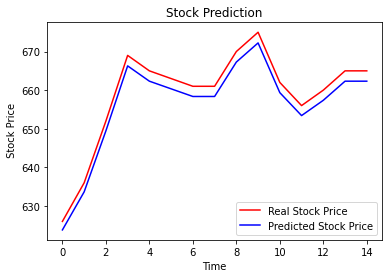

In [39]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [40]:
# getting the real stock price 

training_data = pd.read_csv('stock_data/AXISBANK.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2007-08-16,588.00,594.9,551.00,558.0,557.85,860905.0,4860.75
1,2007-08-17,546.05,581.0,534.00,577.0,575.15,1338154.0,7494.97
2,2007-08-20,585.00,609.0,577.00,603.5,604.65,878025.0,5210.58
3,2007-08-21,613.90,613.9,587.00,587.0,590.90,441898.0,2647.03
4,2007-08-22,592.00,599.7,561.15,584.0,582.55,551499.0,3189.04


In [41]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,588.00
1,546.05
2,585.00
3,613.90
4,592.00


In [45]:
# getting the predicted stock price 

predicted_stock_price = model.predict(x_train)
#predicted_stock_price = mm.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[0.16980137]
 [0.16200724]
 [0.17772558]
 ...
 [0.3932983 ]
 [0.38381407]
 [0.37687346]]


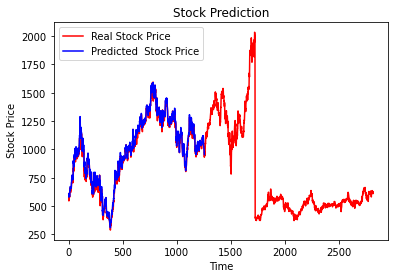

In [43]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()